# Pytorch 101 - Tensors

Tensor is a just a multi-dimensional array just like numpy's ndarry.
Both are wrappers around contiguous memory blocks
PyTorch tensors differs because:
 - They can live on GPU(Cuda)
 - Support autograd (automatic differentiation)
 - Have views and copies (important for memory efficiency )

### Tensor structure (Conceptually)
- Data Pointer -> points to raw memory where elements are stored
- Shape -> dimensions of the tensor
- Stride -> How many steps to jump in memory to move along each axis
- DataType(dtype) -> eg. `float64`, `int64`
- Device -> CPU, GPU, etc.

#### Stride
Stride(3, 1) means:
 - To move one row down -> jump 3 elements in memory
 - To move one column right -> jump 1 element

In [13]:
import torch 

x = torch.tensor(
    [[1, 2],
    [3, 4]],
    dtype=torch.int16,
    device='cuda:0',
    requires_grad=False,
    pin_memory=True, # lock the memory prevents os from moving it around benefits performance during data transfer from cpu to gpu
)

print(x)
print(x.dtype)
print(x.stride())
print(x.shape)
print(x.device)

tensor([[1, 2],
        [3, 4]], device='cuda:0', dtype=torch.int16)
torch.int16
(2, 1)
torch.Size([2, 2])
cuda:0


## AutoGrad
Gradients are essentially derivatives (the rate of change) for functions with multiple variables, which plays crucial role in help neural network learn.
The mathematical operations for finding derivatives are defined for continuous functions, floating-point numbers (like 1.0, 2.89) are used to represent continuous values.
When we set Pytorch `require_grad=True` on a tensor, it tells torch's autograd engine to track all the operations performed on it, so it can automatically compute the gradients during back-propogation.

> Since gradients are only mathematically well-defined for continuous functions, torch restricts this feature to tensors with float or completx data types: Doesn't work with discrete values like int.

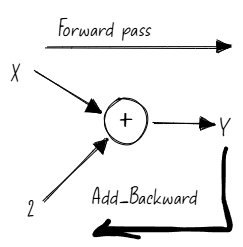


In [30]:
import torch 

x = torch.randn(3, requires_grad=True)

print(x)

# When you do x += 2 with x being tensor enabled with requires_grad=True, you cannot do that in-place operation, because it would modify the value of x, and the autograd engine would not be able to track the changes properly.
# Instead, you should create a new tensor y that is the result of the operation.
# wrong: x += 2
y = x + 2
z = y.sum()
z.backward()
x.grad


tensor([-0.6971, -2.6107, -0.7849], requires_grad=True)


tensor([1., 1., 1.])

### Tensor Operations

In [33]:
# Indexing and slicing tensors
import torch 
x =  torch.tensor(
    [[1, 2], [4, 5]]
)

print("Original Tensor:\n", x)
print(x)

# Access first row
print(x[0])

# Access single element
print(x[1, 1])


Original Tensor:
 tensor([[1, 2],
        [4, 5]])
tensor([[1, 2],
        [4, 5]])
tensor([1, 2])
tensor(5)


In [34]:
# Slicing tensor
import torch

x = torch.tensor(
    [[1, 2, 3],
     [4, 5, 6]]
)
print("Original tensors: ", x)

print(x[:, 1]) # all rows, second column
x_sliced = x[:, 1:]
print("\nSliced Tensor:\n", x_sliced)

Original tensors:  tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([2, 5])

Sliced Tensor:
 tensor([[2, 3],
        [5, 6]])


In [32]:
# Indexing with boolean masks
import torch
x = torch.arange(10)
print("Original tensor:", x)

# assume, we want to find elements greater than 5
mask = x > 5
print("\nBoolean Mask (x > 5):", mask)

print("\nElements greater than 5:", x[mask])

Original tensor: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Boolean Mask (x > 5): tensor([False, False, False, False, False, False,  True,  True,  True,  True])

Elements greater than 5: tensor([6, 7, 8, 9])


In [ ]:
# torch.cat vs torch.stack
# (Joining tensors)

import torch

# cat glues tensors together along an existing dimension. The tensor must have the same shape, 
# except in the dimension corresponding to the concatenation dimension.

t1 = torch.tensor([[1, 2], [3, 4]])
t2 = torch.tensor([[5, 6], [7, 8]])
print(t1.shape)
print(t2.shape)

# concatenate along rows (dim:0)
t_cat = torch.cat(
    (t1, t2), dim=0
)

print("Concatenated Tensor:\n", t_cat)
print("Resulting shape:", t_cat.shape)

# Concat along columns (dim:1)
t_cat_col = torch.cat(
    (t1, t2), dim=1
)

print("Concatenated Tensor along columns:\n", t_cat_col)
print("Resulting shape:", t_cat_col.shape)


print("--" * 10)

# Stack create a new dimension and joins the tensors along it.
# This is used to create a higher-dimensional tensor from a list of lower-dimensional ones
# All tensors being stacked must have the exact same shape

stack_dim0 = torch.stack([t1, t2], dim=0)
print("Stacked Tensor along new dimension (dim=0):\n", stack_dim0)
print("Resulting shape:", stack_dim0.shape)


torch.Size([2, 2])
torch.Size([2, 2])
Concatenated Tensor:
 tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
Resulting shape: torch.Size([4, 2])
Concatenated Tensor along columns:
 tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])
Resulting shape: torch.Size([2, 4])
--------------------
Stacked Tensor along new dimension (dim=0):
 tensor([[[1, 2],
         [5, 6]],

        [[3, 4],
         [7, 8]]])
Resulting shape: torch.Size([2, 2, 2])


#### Tensor Math operations

In [ ]:
# 1. Element-wise operations

import torch 

x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])

# Most standard math operations (+, -, *, /) work on element-by-element basis.
# but the tensors must have the same shape


z = x + y
print("Element-wise addition:\n", z)

z = x * y
print("Element-wise multiplication:\n", z)

z = x - y
print("Element-wise subtraction:\n", z)

z = x / y
print("Element-wise division:\n", z)

Element-wise addition:
 tensor([5, 7, 9])
Element-wise multiplication:
 tensor([ 4, 10, 18])
Element-wise subtraction:
 tensor([-3, -3, -3])
Element-wise division:
 tensor([0.2500, 0.4000, 0.5000])


In [44]:
# Matrix Multiplication 
import torch

x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[5, 6], [7, 8]])

# The `@` operator or `torch.matmul` can be used for matrix multiplication
# This is dot-production operation (pretty high school math - huh?)
# also same, the column of the first matrix must match the row of the second
z = x @ y
print("Matrix multiplication result:\n", z)

Z_mul = torch.matmul(x, y)
print("Matrix multiplication result using torch.matmul:\n", Z_mul)

Matrix multiplication result:
 tensor([[19, 22],
        [43, 50]])
Matrix multiplication result using torch.matmul:
 tensor([[19, 22],
        [43, 50]])


### Shape Manipulation

- The key idea is that the data is ofter stored in flat, one-dimensional block of memory
- Shape manipulation functions are tools that change how pytorch interprets that block of memory, usually without creating new copies of the data


In [59]:
import torch 

x = torch.arange(12)
print("Original tensor:\n", x)
print("Original shape:", x.shape)

x_3x4 = x.reshape(3, 4) # Note: new copy of the data is not created, only how torch interprets the data is modified
print("Reshaped tensor (3x4):\n", x_3x4) 
print("New shape:", x_3x4.shape)

print("-" * 20)

# -1 trick
# we can use -1 in one of the dimensions, and pytorch will automatically infer the correct size
x_3x4_neg1 = x.reshape(3, -1)
print("Reshaped tensor (3x4 with -1):\n", x_3x4_neg1)
print("New shape:", x_3x4_neg1.shape)

print("-" * 20)
# Squeeze and unsqueeze

x = torch.arange(12).reshape(3, 4)
print("Original shape:", x.shape)

x_batched = x.unsqueeze(dim=0)
print("Batched shape:", x_batched.shape)

x_unbatched = x_batched.squeeze(dim=0)
print("Shape after squeeze(0):", x_unbatched.shape)

print("-" * 20)

# Permute() - Rearranging dimensions

# Fake image tensors: batch x height x width x channels
x_nhwc = torch.randn(1, 224, 224, 3)
print("Original shape:", x_nhwc.shape)

# PyTorch's CNN layer expect (N, C, H, W)
# We need to move the channels dimensions to be after the batch dim
x_permuted = x_nhwc.permute(0, 3, 1, 2)
print("Permuted shape:", x_permuted.shape)


Original tensor:
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Original shape: torch.Size([12])
Reshaped tensor (3x4):
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
New shape: torch.Size([3, 4])
--------------------
Reshaped tensor (3x4 with -1):
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
New shape: torch.Size([3, 4])
--------------------
Original shape: torch.Size([3, 4])
Batched shape: torch.Size([1, 3, 4])
Shape after squeeze(0): torch.Size([3, 4])
--------------------
Original shape: torch.Size([1, 224, 224, 3])
Permuted shape: torch.Size([1, 3, 224, 224])


### Dataset and DataLoader

`torch.utils.data.Dataset` and `torch.utils.data.DataLoader` are essential tools for managing and loading data in PyTorch. They provide a flexible and efficient way to handle datasets,
whether they are small and in-memory or large and stored on disk.

A `Dataset` is an abstract class that represents a dataset. To create a custom dataset, you need to inherit from `torch.utils.data.Dataset` and implement two methods.

- `__len__(self)`: This method should return the total number of samples in the dataset
- `__getitem__(self, index)`: This method should return the sample at the given index. A sample can be tuple of (data, label), a dictionary, or any other data structure.


A DataLoader is an iterator that provides an efficient way to iterate over a Dataset. It can automatically batch the data, shuffle it, and load it in parallel using multiple workers.


- *Batching*: It groups individual samples into batches of a specified size.
- *Shuffling*: It can shuffle the data at the beginning of each epoch to reduce variance and prevent the model from learning the order of the data.
- *Parallelism*: It can use multiple subprocesses to load the data in parallel, which can significantly speed up data loading, especially for large datasets.


In [1]:
import torch
from torch.utils.data import Dataset, DataLoader


class MyDataset(Dataset):
    def __init__(self):
        self.data = torch.randn(10000, 10)
        self.labels = torch.randint(0, 2, (10000, ))
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        return self.data[index], self.labels[index]
    
    
my_dataset = MyDataset()   
my_dataloader = DataLoader(
    my_dataset,
    batch_size=128,
    shuffle=True,
)

for batch_data, batch_labels in my_dataloader:
    print("Batch data shape:", batch_data.shape)
    print("Batch labels shape:", batch_labels.shape)
    break

Batch data shape: torch.Size([128, 10])
Batch labels shape: torch.Size([128])


### Neural network: Building blocks

1. `nn.Module`: This is the base class for all neural network modules in pytorch. we can create our own network by creating a class that inherits from nn.Module. It provideed essential functionality like tracking all the learnable parameters (weights and biases) of your model.

2. Layers(`nn.Linear`, `nn.Conv2d`, etc.): These are fundamental building blocks that perform the actual data transformation. The most basic and common one is the `nn.Linear` layer, also know as a fully-connected or dense layer. It applies a linear transformation to the incoming data: `y = x.A^T + b`
    - x is the input
    - A is the weight matrix
    - b is the bias vector
    - y is the output
    (the weights and biases are the learnable parameters that get updated during the training process)

3. Activation function (ReLU, Sigmoid, etc.): After a linear transformation we need to introduce non-linearity. Without non-linearity, network cannot learn complex patterns. The
activation function is applies element-wise to the output of a layer.
    - `nn.ReLU`: The rectified Linear unit is the most common activation function. It is a simple function that return `max(0, x)`. It's computationally efficient and helps mitigate the vanishing gradient problem.
    - `nn.Sigmoid`: This function squashes values between 0 and 1. It's often used in the output layer for binary classification problems, where the output can be interpreted as a probability.

In [ ]:
import torch
import torch.nn as nn


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc = nn.Linear(10, 512)
        self.fc2 = nn.Linear(512, 246)
        self.fc3 = nn.Linear(246, 1)
        
    def forward(self, x):
        x = self.fc(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        return x

net = MyNet().to(device)

# training loop

criterion = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(net.parameters(), lr=0.001)

num_epoch = 50
epoch_loss = []

for epoch in range(num_epoch):
    running_loss = 0.0
    
    for i, data in enumerate(my_dataloader, 0):
        inputs, labels = data
    
        inputs = inputs.to(device)
        labels = labels.to(device)

        optim.zero_grad()
        outputs = net(inputs)
        
        outputs = outputs.view(-1)
        labels = labels.float()
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optim.step()
        running_loss += loss.item()
        if i % 10 == 9:
            print(f"Epoch [{epoch+1}/{num_epoch}], Step [{i+1}/{len(my_dataloader)}], Loss: {running_loss/10:.4f}")
            running_loss = 0.0

    epoch_loss.append(running_loss / len(my_dataloader))

with torch.no_grad():
    sample_data = torch.randn(1, 10).to(device)
    prediction = net(sample_data)
    pred_class = (torch.sigmoid(prediction) > 0.5).int().item()
    print("Predicted class:", pred_class)

Using device: cuda


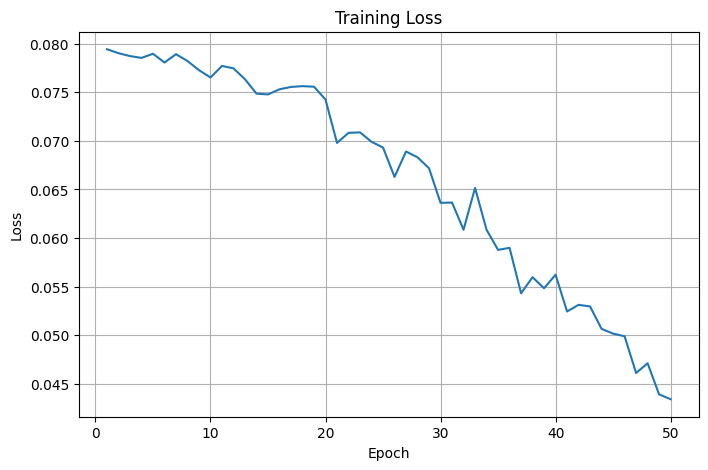

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epoch + 1), epoch_loss)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

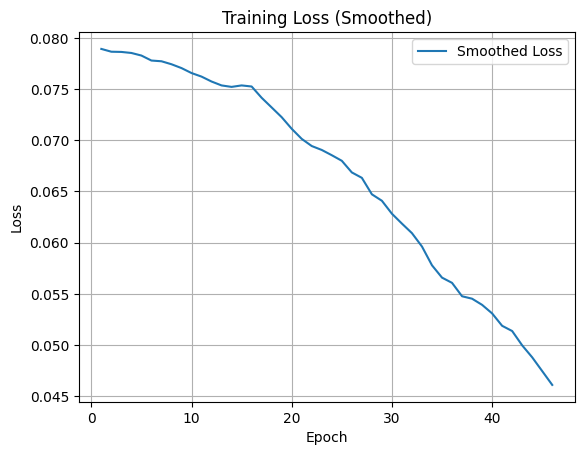

In [7]:
import numpy as np

def moving_average(x, w=5):
    return np.convolve(x, np.ones(w)/w, mode='valid')

smoothed_losses = moving_average(epoch_loss, w=5)

plt.plot(range(1, len(smoothed_losses)+1), smoothed_losses, label="Smoothed Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss (Smoothed)")
plt.legend()
plt.grid(True)
plt.show()


### Understanding the internals


#### `.train()` vs `.eval()`

In PyTorch, nn.Module has 2 modes that are critical for correct model behavior:
- Training mode: `.train()`
- Evaluation mode: `.eval()`

* `model.train()`: This set the module and all its submodules to training mode. this is important for the layers that have different behaviors during training and inference.
    - Dropout(`nn.Dropout`): During training, it randomly zeros some of the elements of the input tensor with probability p. This is regularization technique to prevent co-adaptation of neurons. During evaluation, you want to use the entire network, so dropout is turned off.
    - Batch Normalization(`nn.BatchNorm`): This layer normalizes its output using the mean and standard deviation of the current batch of inputs. It also maintains a running estimate of the mean and standard deviation of the entire dataset. 
        - In training mode, it updates these running estimates with the statistics from each new batch
        - In evaluation mode, it stops updating the running estimates and use the saved estimates to normalize the input. This ensure that the model output is deterministic and not dependent on the specific batch it's evaluating.

* `model.eval()`: This sets the module and its submodules to evaluation mode. This disables dropout and makes batch normalization use it running estimates.

##### Why it is important:

Forget to call `model.eval()` during inference/testing, the model output will be inconsistent and non-deterministic because dropout will still be active and batch normalization will be using the statistics of small test batch instead of the global statistics of the training data.

##### Implementation:

- `model.train()` before the training loop
- `model.eval()` before the evaluation or inference loop



In [3]:
import torch
import torch.nn as nn


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc = nn.Linear(10, 512)
        self.fc2 = nn.Linear(512, 246)
        self.fc3 = nn.Linear(246, 1)
        
    def forward(self, x):
        x = self.fc(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        return x

net = MyNet().to(device)

# training loop

criterion = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(net.parameters(), lr=0.001)

num_epoch = 50
epoch_loss = []


# set training mode before training loop
net.train()
for epoch in range(num_epoch):
    running_loss = 0.0
    
    for i, data in enumerate(my_dataloader, 0):
        inputs, labels = data
    
        inputs = inputs.to(device)
        labels = labels.to(device)

        optim.zero_grad()
        outputs = net(inputs)
        
        outputs = outputs.view(-1)
        labels = labels.float()
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optim.step()
        running_loss += loss.item()
        if i % 10 == 9:
            print(f"Epoch [{epoch+1}/{num_epoch}], Step [{i+1}/{len(my_dataloader)}], Loss: {running_loss/10:.4f}")
            running_loss = 0.0

    epoch_loss.append(running_loss / len(my_dataloader))

# set eval mode before inference
net.eval()
with torch.no_grad():
    sample_data = torch.randn(1, 10).to(device)
    prediction = net(sample_data)
    pred_class = (torch.sigmoid(prediction) > 0.5).int().item()
    print("Predicted class:", pred_class)

Using device: cuda
Epoch [1/50], Step [10/79], Loss: 0.7023
Epoch [1/50], Step [20/79], Loss: 0.6986
Epoch [1/50], Step [30/79], Loss: 0.6980
Epoch [1/50], Step [40/79], Loss: 0.6940
Epoch [1/50], Step [50/79], Loss: 0.6978
Epoch [1/50], Step [60/79], Loss: 0.6919
Epoch [1/50], Step [70/79], Loss: 0.6956
Epoch [2/50], Step [10/79], Loss: 0.6920
Epoch [2/50], Step [20/79], Loss: 0.6919
Epoch [2/50], Step [30/79], Loss: 0.6902
Epoch [2/50], Step [40/79], Loss: 0.6929
Epoch [2/50], Step [50/79], Loss: 0.6912
Epoch [2/50], Step [60/79], Loss: 0.6940
Epoch [2/50], Step [70/79], Loss: 0.6951
Epoch [3/50], Step [10/79], Loss: 0.6904
Epoch [3/50], Step [20/79], Loss: 0.6922
Epoch [3/50], Step [30/79], Loss: 0.6909
Epoch [3/50], Step [40/79], Loss: 0.6929
Epoch [3/50], Step [50/79], Loss: 0.6910
Epoch [3/50], Step [60/79], Loss: 0.6923
Epoch [3/50], Step [70/79], Loss: 0.6897
Epoch [4/50], Step [10/79], Loss: 0.6882
Epoch [4/50], Step [20/79], Loss: 0.6903
Epoch [4/50], Step [30/79], Loss: 0.69

### Gradient Accumulation

First, Let's talk about where gradients are stored. When we create a tensor with `requires_grad=True`, PyTorch create a `.grad` attribute for it. This attribute is initialized to `None`.

When we compute a loss and call `loss.backward()`, Pytorch traverses the computation graph backward(from the loss) and computes the gradients of the loss with respect to the each tensor that has requires_grad=True down to the leaf node(tensor) in the computation graph. These gradients are then stored in the .grad attribute of the those tensors.

###### Why Gradients Accumulate?

When we call `loss.backward()` a second time, Pytroch doesn't overwrite the existing values in `.grad`. It adds the newly computed gradients to them.

Let's discuss why this behavior is default and intentional.
Gradient accumulation is a powerful technique used to train with a "virtual" batch size that is larger than what can fit in your GPU's memory.

Imagine you want to use a batch size of 1024, but you GPU can only handle a batch size of 256 with OOM error, you can acheive this with gradient accumulation.

> DataLoader(BatchSize=256) -> (4 batches * 256 = 1024) -> for each 4 batches, perform `loss.backward()` which accumulates gradients for 4 batches -> finally, `optimizer.step()` will perform updates 

###### The Role of `optimizer.zero_grad()``

For the vast majority of the training scenarios, you want to update your weights based on the gradients from only the current batch and mostly don't want the gradients from the previous batch to interface.

This is why we must manually reset the gradients to zero at the beginning of the each training interation (i.e., for each batch)

The `optimizer.zero_grad()` method does exactly this. It iterates through all the parameters that the optimizer is responsile for and sets their .grad attributes back to zero.

#### Weight Initialization (nn.init)

Weight initialization in neural network training have huge impact on the early stage of model training and convergence.
- If weights are initalized with large values -> Exploding Gradients
- If weights are initialized with small values -> Vanishing Gradients

PyTorch layers have a default initialization that is often reasonable, but research has shown that using specific initialization strategies taileredt to the network arch. particularly its activation functions, can lead to more stable and efficient training.
- https://www.deeplearning.ai/ai-notes/initialization/index.html
- https://arxiv.org/pdf/1502.01852

ReLU -> Kaiming (He) Initialization

The core idea is to set the initial weights of a layer in a way that keeps the variance of the layer's output the same as the variance of its inputs.
Var(L(x)) == Var(L(y^))

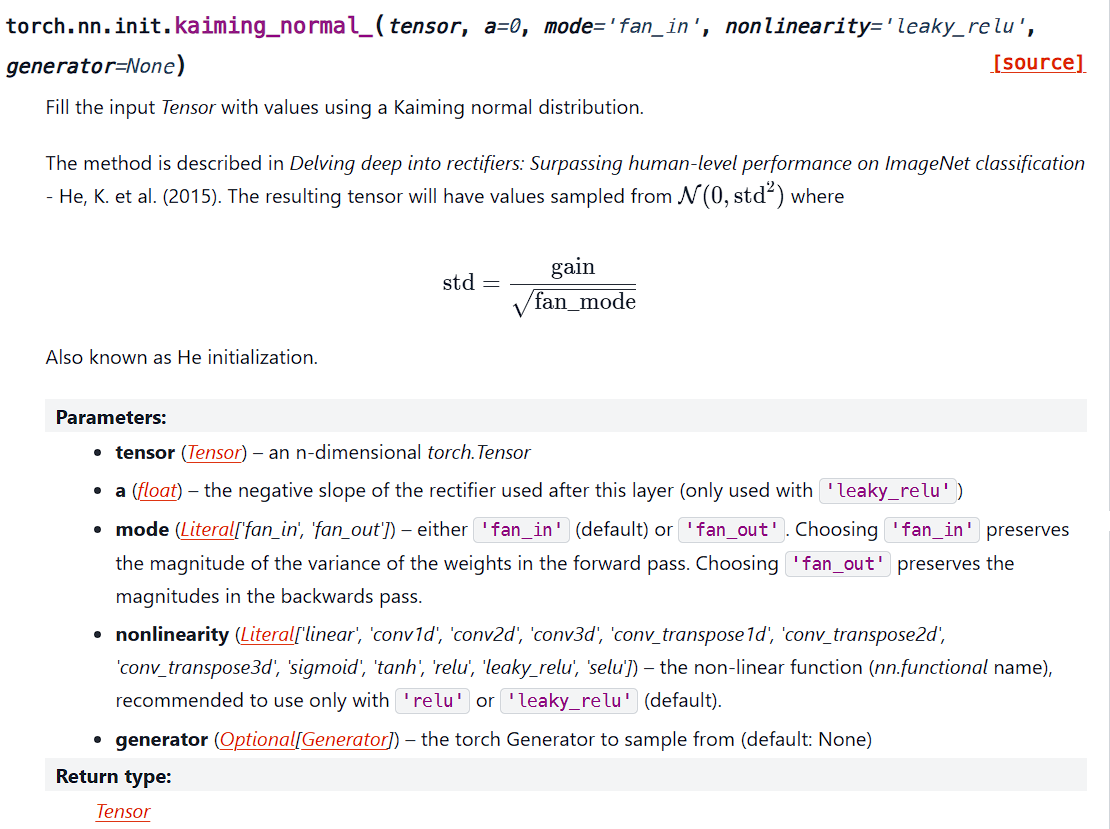

In [4]:
import torch.nn as nn 


class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc = nn.Linear(10, 512)
        self.fc2 = nn.Linear(512, 246)
        self.fc3 = nn.Linear(246, 1)
        self.__init_weights()
        
    def __init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu', mode='fan_in')
        
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
                    
    def forward(self, x):
        x = self.fc(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        return x

#### Learning Rate Scheduling (torch.optim.lr_scheduler)

The learning rate is arguable the most important hyperparameter to tune. It determines the size of the steps the model takes in the loss landscape as it tries to find a minimum.

- *If the learning rate is too high*: The model can take steps that are too large, overshooting the optimal point and bouncing around erratically, possibly never converging
- *If the learning rate is too low*: The model will learn very slowly, and training will take an unnecessarily long time. It might also get stuck in a suboptimal local minimum because it doesn't have enough "momentum" to jump out of it.

A fixed learning rate is often not ideal. Intuitively, we want to take large steps at the beginning of the training when we are far from the optimal solution and then take smaller, more careful steps are we get closer to it to avoid overshooting. This is exactly what a learning rate scheduler does: it automates the process of adjusting the learning rate during training


In PyTorch, `torch.optim.lr_scheduler` module helps to create a scheduler object and attach it the optimizer. Then we call `scheduler.step()` at end of each epoch to tell it to update the learning rate according to its specific policy.

`StepLR` decays the learning rate by a specified factor(gamma) every N epochs (step_size)

In [ ]:
# rewrite the MyNet with StepLR

import torch
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc = nn.Linear(10, 512)
        self.fc2 = nn.Linear(512, 246)
        self.fc3 = nn.Linear(246, 1)
        
    def forward(self, x):
        x = self.fc(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        return x

net = MyNet().to(device)

# training loop
criterion = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(net.parameters(), lr=0.001)

scheduler = StepLR(optim, step_size=10, gamma=0.1)

num_epoch = 50
epoch_loss = []


# set training mode before training loop
net.train()
for epoch in range(num_epoch):
    running_loss = 0.0
    
    for i, data in enumerate(my_dataloader, 0):
        inputs, labels = data
    
        inputs = inputs.to(device)
        labels = labels.to(device)

        optim.zero_grad()
        outputs = net(inputs)
        
        outputs = outputs.view(-1)
        labels = labels.float()
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optim.step()
        running_loss += loss.item()
        if i % 10 == 9:
            print(f"Epoch [{epoch+1}/{num_epoch}], Step [{i+1}/{len(my_dataloader)}], Loss: {running_loss/10:.4f}")
            running_loss = 0.0

    epoch_loss.append(running_loss / len(my_dataloader))
    scheduler.step()
# set eval mode before inference
net.eval()
with torch.no_grad():
    sample_data = torch.randn(1, 10).to(device)
    prediction = net(sample_data)
    pred_class = (torch.sigmoid(prediction) > 0.5).int().item()
    print("Predicted class:", pred_class)

### Handling Image Data with `torchvision`

- `torchvision.datasets`
- `torchvision.transforms`

1. Transforms: The preprocessing pipeline

When you load an image, it's usually a PIL Image object or a NumPy array with pixel values from 0 to 255. A neural network, however, expects a normalized floating-point tensor. `transforms` is the bridge.

The two most fundamental transforms are:

- `transforms.ToTensor()`: This does two crucial things:
    1. Converts a PIL image or NumPy array of shape(H, W, C) into a PyTorch FloatTensor of shape(C, H, W)
    2. Scales the pixel value from the range [0, 255] to [0.0, 0.1].

- `transforms.Normalize(mean, std)`: 
    It takes a tensor image and normalizes it channel by channel using the formula: output = (input - mean) / std.
    Why is this so important? It scales the input data so that it has a mean of 0 and a standard deviation of 1. This ensures that all input features (pixels) are on a comparable scale. Without normalization, features with larger value ranges could dominate the learning process, leading to slower convergence and a less stable training process. The mean and std values are typically pre-computed on the training dataset. For datasets like CIFAR-10 or ImageNet, these values are well-known.

In practise, we typically chain these transforms together using `transforms.Compose`

### Data Augmentation

Imagine you're training a cat classifier. If all the cats in your dataset are facing left, your model might learn that "facing left" is a key feature of a cat. It would then fail to recognize a cat facing right and straight.

Data augmentation solves this by creating a modified version of the training images on the fly. By applying random transformations, you teach the model to ignore irrelevant variations and focus on the actual object. This is a powerful form of regularization that helps prevent overfitting and improves the model's performance on unseen data.

Common augmentation transforms include:
* transforms.RandomHorizontalFlip(): Flips the image horizontally with a given probability.
* transforms.RandomRotation(degrees): Rotates the image by a random angle.
* transforms.ColorJitter(): Randomly changes the brightness, contrast, and saturation.
* transforms..RandomResizedCrop(): Crops a random part of the image and resizes it

In [7]:
import torch 
import torchvision 
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=train_transform
)

test_dataset = torchvision.datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=test_transform
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

dataiter = iter(train_loader)
images, labels = next(dataiter)

print("Shape of one batch of images:", images.shape)
print("Data type of the images:", images.dtype)
print("Mean of the first image in the batch:", torch.mean(images[0]))
print("Std dev of the first image in the batch:", torch.std(images[0]))

100.0%


Shape of one batch of images: torch.Size([64, 3, 32, 32])
Data type of the images: torch.float32
Mean of the first image in the batch: tensor(-0.3089)
Std dev of the first image in the batch: tensor(1.1011)


#### Handling Text Data with torchtext

Working with text has its own unique challenges compared to images. While images are typically fixed-size grids of numbers, text is a sequence of variable-length,
discrete units (words or characters). The core goal is the same: we need to convert these raw text strings into numerical tensors.

The process generally involves three steps:
1. Tokenization: Splitting a sentence into a list of individual words or "tokens".
2. Vocabulary Building: Creating a mapping from each unique token to a unique integer index.
3. Numericalization: Using the vocabulary to convert a list of tokens into a list of integers.


A Note on `torchtext`: The torchtext library has evolved. Many older tutorials use a legacy API (Field, BucketIterator). We will focus on the modern, more flexible
approach that integrates directly with PyTorch's standard Dataset and DataLoader.

[The Challenge: Variable-Length Sequences]

When you create a batch of images, they are all the same size, so you can easily stack them into a single tensor. But what about sentences?
* "I love PyTorch" (3 tokens)
* "Data handling is fundamental" (4 tokens)

You can't stack these into a regular tensor. The solution is padding. We decide on a maximum length for a batch and add a special "padding" token to the end of shorter
sequences until they all have the same length. This is handled by a special collate_fn function in the DataLoader.

In [ ]:
import torch 
from torch.utils.data import DataLoader
from torchtext.datasets import AG_NEWS
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator


tokenizer = get_tokenizer("basic_english")

train_iter, test_iter = AG_NEWS(split=('train', 'test'))

def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text)
        
vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>", "<pad>"])
vocab.set_default_index(vocab["<unk>"])

text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: int(x) - 1


def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for (_label, _text) in batch:
        label_list.append(label_pipeline(_label))
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        text_list.append(processed_text)
        offsets.append(processed_text.size(0))
        
    label_list = torch.tensor(label_list, dtype=torch.int64)
    text_list = torch.cat(text_list)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    return label_list, text_list, offsets

train_iter, test_iter = AG_NEWS(split=('train', 'test'))
train_dataloader = DataLoader(list(train_iter), batch_size=8, shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(list(test_iter), batch_size=8, shuffle=False, collate_fn=collate_batch)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
labels, text, offsets = next(iter(train_dataloader))

print("Labels shape:", labels.shape) # [batch_size]
print("Text tensor shape:", text.shape) # [total_tokens_in_batch]
print("Offsets shape:", offsets.shape) # [batch_size]
print("\nExample of first label:", labels[0])
print("Example of offsets:", offsets)
print("This tells us the first sequence starts at index 0, the second at index 'offsets[1]', etc.")